# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [32]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

> **Note:** If you are not that friendly with markdown and latex you can refer to an external document with the model description instead.

We consider the **standard Solow-model** where:

1. $K_t$ is capital
* $L_t$ is labor (growing with a constant rate of $n$)
* $A_t$ is technology (growing with a constant rate of $g$)
* $Y_t = F(K_t,A_tL_t)$ is GDP

**Saving** is a constant fraction of GDP

$$ S_t = sY_t,\,s\in(0,1) $$

such that **capital accumulates** according to

$$ K_{t+1}=S_{t}+(1-\delta)K_{t}=sF(K_{t},A_{t}L_{t})+(1-\delta)K_{t}, \delta \in (0,1) $$

The **production function** has **constant-return to scale** such that

$$ \frac{Y_{t}}{A_{t}L_{t}}=\frac{F(K_{t},A_{t}L_{t})}{A_{t}L_{t}}=F(\tilde{k}_{t},1)\equiv f(\tilde{k}_{t}) $$

where $\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$ is the technology adjusted capital-labor ratio.

The **transition equation** then becomes

$$ \tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}_{t})+(1-\delta)\tilde{k}_{t}] $$

We assume the **production function** is **Cobb-Douglas** so

$$ F(K_{t},A_{t}L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\Rightarrow f(\tilde{k}_{t})=\tilde{k}_{t}^{\alpha} $$

# Steady state

## Analytical solution

We can use **sympy** to find an analytical expression for the steady state, i.e. solve

$$ \tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] $$

First we define all **symbols**:

In [33]:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

Then we define the **steady state equation**

In [34]:
ss = sm.Eq(k,(s*k**alpha+(1-delta)*k)/((1+n)*(1+g)))

and **solve** it

In [35]:
kss = sm.solve(ss,k)[0]
kss

((delta + g*n + g + n)/s)**(1/(alpha - 1))

For later use, we turn the solution into a **Python funciton**

In [36]:
ss_func = sm.lambdify((s,g,n,alpha,delta),kss)

## Numerical solution

We can re-write the equation for the steady state capital per capita as

\\[ 0 = \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] - \tilde{k}^{\ast} \\]

whereby it clearly becomes a **root-finding problem**. Such a problem can be solved by a **bisection method**.

Define the model **parameters**:

In [37]:
s = 0.2
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.1

**Solve numerically** for the steady state:

In [38]:
solution = modelproject.solve_for_ss(s,g,n,alpha,delta)

print(f'analytical solution is: {ss_func(s,g,n,alpha,delta):.3f}')
print(f' numerical solution is: {solution.root:.3f}')

analytical solution is: 1.904
 numerical solution is: 1.904


# Further analysis

ADD FURTHER ANALYSIS, VISUALIZATIONS AND EXTENSIONS.

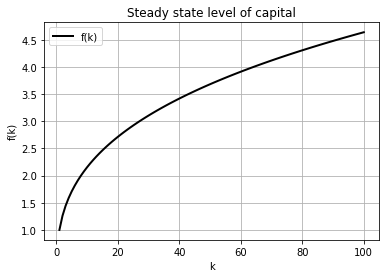

In [44]:
# set sample size
N = 100

#plot of f(k)

#Initiating figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Define variables for capital
k_vec = np.linspace(1,100,N)
f = np.empty(N)
    
for i,k in enumerate(k_vec):
    f[i] = k ** alpha
    
#Plotting output pr. capita against capital pr. capita
ax.plot(k_vec, f, ls = '-', lw = 2, color = 'black', label = 'f(k)')


#Formatting the visual presentation
ax.set_xlabel('k')
ax.set_ylabel('f(k)')
ax.set_title('Steady state level of capital')
ax.grid(True)
ax.legend(loc = 'upper left')

# Conclusion

ADD CONCISE CONCLUSION.